In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import *

In [2]:
df = pd.read_csv("240415_Cq_raw.csv")
df = df.iloc[:, 1:]
df = df.query("Content != 'NTC' and not Cq.isna()")
df = df.drop(["Target"], axis = 1)
df["target"] = df['Sample'].map(lambda s: s.split("_")[-1])
df["group"] = df['Sample'].map(lambda s: "_".join(s.split("_")[:-1]))
df['mean_cq'] = df.groupby("Sample")["Cq"].transform('mean')
df['se_cq'] = df.groupby("Sample")["Cq"].transform(lambda sample: sample.std() / sample.count() ** 0.5)

In [3]:
with pd.option_context("display.max_rows", None):
    display(df)

,Well,Fluor,Content,Sample,Cq,SQ,target,group,mean_cq,se_cq
0,A01,SYBR,Pos Ctrl-01,ZIM3_ctrl_M1,16.044000,NaN,M1,ZIM3_ctrl,16.101405,0.034560
1,A02,SYBR,Pos Ctrl-01,ZIM3_ctrl_M1,16.096767,NaN,M1,ZIM3_ctrl,16.101405,0.034560
2,A03,SYBR,Pos Ctrl-01,ZIM3_ctrl_M1,16.163448,NaN,M1,ZIM3_ctrl,16.101405,0.034560
4,A05,SYBR,Unkn-01,ZIM3_ctrl_GF,36.471032,NaN,GF,ZIM3_ctrl,36.185949,0.561591
5,A06,SYBR,Unkn-01,ZIM3_ctrl_GF,35.102558,NaN,GF,ZIM3_ctrl,36.185949,0.561591
6,A07,SYBR,Unkn-01,ZIM3_ctrl_GF,36.984257,NaN,GF,ZIM3_ctrl,36.185949,0.561591
8,A09,SYBR,Unkn-09,ZIM3_ctrl_U6,32.300980,NaN,U6,ZIM3_ctrl,32.640001,0.267186
9,A10,SYBR,Unkn-09,ZIM3_ctrl_U6,32.451792,NaN,U6,ZIM3_ctrl,32.640001,0.267186
10,A11,SYBR,Unkn-09,ZIM3_ctrl_U6,33.167232,NaN,U6,ZIM3_ctrl,32.640001,0.267186
12,B01,SYBR,Pos Ctrl-02,040_nuclei_M1,16.695441,NaN,M1,040_nuclei,16.612141,0.049836


In [4]:
df_cq = df[["target", "group", "mean_cq", "se_cq"]].copy()
df_cq.drop_duplicates(inplace = True)
df_cq["condition"] = df['group'].map(lambda s: s.split("_")[-1])
vector_lookup = {'047': 'Ctrl', '040': "SIRLOIN_TSO"}
df_cq["Vector"] = df["group"].map(lambda s: vector_lookup.get(s.split("_")[0]))
df_cq = df_cq.query("group not in ['ZIM3_ctrl', 'NTC']")

In [5]:
df_cq

,target,group,mean_cq,se_cq,condition,Vector
12,M1,040_nuclei,16.612141,0.049836,nuclei,SIRLOIN_TSO
16,GF,040_nuclei,20.464627,0.045716,nuclei,SIRLOIN_TSO
20,U6,040_nuclei,26.583434,0.043794,nuclei,SIRLOIN_TSO
24,M1,040_whole,15.054048,0.081181,whole,SIRLOIN_TSO
28,GF,040_whole,15.762390,0.109039,whole,SIRLOIN_TSO
32,U6,040_whole,22.135783,0.033734,whole,SIRLOIN_TSO
36,M1,047_nuclei,16.677094,0.095429,nuclei,Ctrl
40,GF,047_nuclei,20.797354,0.138729,nuclei,Ctrl
44,U6,047_nuclei,27.235297,0.142206,nuclei,Ctrl
48,M1,047_whole,15.409043,0.073984,whole,Ctrl


In [6]:
df_ref = df_cq.query("target == 'M1'")
ref_cq = dict(zip(df_ref.group.tolist(), df_ref.mean_cq.tolist()))
ref_se = dict(zip(df_ref.group.tolist(), df_ref.se_cq.tolist()))

In [7]:
# https://www.sciencedirect.com/science/article/pii/S088875432032053X#:~:text=A%20confidence%20interval%20for%20the,estimate%20using%20a%20statistical%20model.

df_cq["deltaCq"] = df_cq.apply(lambda df: df.mean_cq - ref_cq.get(df.group), axis = 1)
df_cq["se_deltaCq"] = df_cq.apply(lambda df: np.sqrt(df.se_cq ** 2 + ref_se.get(df.group) ** 2), axis = 1)
df_cq

,target,group,mean_cq,se_cq,condition,Vector,deltaCq,se_deltaCq
12,M1,040_nuclei,16.612141,0.049836,nuclei,SIRLOIN_TSO,0.000000,0.070478
16,GF,040_nuclei,20.464627,0.045716,nuclei,SIRLOIN_TSO,3.852485,0.067628
20,U6,040_nuclei,26.583434,0.043794,nuclei,SIRLOIN_TSO,9.971293,0.066344
24,M1,040_whole,15.054048,0.081181,whole,SIRLOIN_TSO,0.000000,0.114808
28,GF,040_whole,15.762390,0.109039,whole,SIRLOIN_TSO,0.708341,0.135941
32,U6,040_whole,22.135783,0.033734,whole,SIRLOIN_TSO,7.081734,0.087911
36,M1,047_nuclei,16.677094,0.095429,nuclei,Ctrl,0.000000,0.134957
40,GF,047_nuclei,20.797354,0.138729,nuclei,Ctrl,4.120260,0.168382
44,U6,047_nuclei,27.235297,0.142206,nuclei,Ctrl,10.558203,0.171258
48,M1,047_whole,15.409043,0.073984,whole,Ctrl,0.000000,0.104629


In [8]:
df_delta_nuc = df_cq.query("Vector == 'Ctrl' and condition == 'nuclei'")
ctrl_deltas_nuc = dict(zip(df_delta_nuc.target.tolist(), df_delta_nuc.deltaCq.tolist()))
ctrl_se_nuc = dict(zip(df_delta_nuc.target.tolist(), df_delta_nuc.se_deltaCq.tolist()))

In [9]:
df_delta_whole = df_cq.query("Vector == 'Ctrl' and condition == 'whole'")
ctrl_deltas_whole = dict(zip(df_delta_whole.target.tolist(), df_delta_whole.deltaCq.tolist()))
ctrl_se_whole = dict(zip(df_delta_whole.target.tolist(), df_delta_whole.se_deltaCq.tolist()))

In [10]:
deltas = {'nuclei': ctrl_deltas_nuc, 'whole': ctrl_deltas_whole}
ses = {'nuclei': ctrl_se_nuc, 'whole': ctrl_se_whole}

In [10]:
deltas

{'nuclei': {'M1': 0.0,
  'GF': 4.120260293625837,
  'U6': 10.558203066457601,
  'OG': 9.632032929697601},
 'whole': {'M1': 0.0,
  'GF': 0.19308132105796538,
  'U6': 6.788891410781298,
  'OG': 5.718490876550652}}

In [11]:
df_cq['ddCq'] = df_cq.apply(lambda df: df.deltaCq - deltas.get(df.condition).get(df.target), axis = 1)
df_cq['se_ddCq'] = df_cq.apply(lambda df: np.sqrt(df.se_deltaCq ** 2 + ses.get(df.condition).get(df.target) ** 2), axis = 1)

In [12]:
df_cq

,target,group,mean_cq,se_cq,condition,Vector,deltaCq,se_deltaCq,ddCq,se_ddCq
12,M1,040_nuclei,16.612141,0.049836,nuclei,SIRLOIN_TSO,0.000000,0.070478,0.000000,0.152252
16,GF,040_nuclei,20.464627,0.045716,nuclei,SIRLOIN_TSO,3.852485,0.067628,-0.267775,0.181456
20,U6,040_nuclei,26.583434,0.043794,nuclei,SIRLOIN_TSO,9.971293,0.066344,-0.586911,0.183660
24,M1,040_whole,15.054048,0.081181,whole,SIRLOIN_TSO,0.000000,0.114808,0.000000,0.155332
28,GF,040_whole,15.762390,0.109039,whole,SIRLOIN_TSO,0.708341,0.135941,0.515260,0.287937
32,U6,040_whole,22.135783,0.033734,whole,SIRLOIN_TSO,7.081734,0.087911,0.292843,0.241476
36,M1,047_nuclei,16.677094,0.095429,nuclei,Ctrl,0.000000,0.134957,0.000000,0.190858
40,GF,047_nuclei,20.797354,0.138729,nuclei,Ctrl,4.120260,0.168382,0.000000,0.238128
44,U6,047_nuclei,27.235297,0.142206,nuclei,Ctrl,10.558203,0.171258,0.000000,0.242196
48,M1,047_whole,15.409043,0.073984,whole,Ctrl,0.000000,0.104629,0.000000,0.147968


In [13]:
df_plot = df_cq.query("Vector != 'Ctrl' and target != 'M1'")[["target", "condition", "Vector", "ddCq", "se_ddCq"]].copy()
df_plot["ddCq_CImax"] = df_plot["ddCq"] + 1.96 * df_plot["se_ddCq"]
df_plot["ddCq_CImin"] = df_plot["ddCq"] - 1.96 * df_plot["se_ddCq"]
df_plot["expressionFC_max"] = df_plot["ddCq_CImax"].map(lambda x: 2**-x)
df_plot["expressionFC_min"] = df_plot["ddCq_CImin"].map(lambda x: 2**-x)
df_plot["expressionFC"] = df_plot["ddCq"].map(lambda x: 2**-x)

In [14]:
df_plot

,target,condition,Vector,ddCq,se_ddCq,ddCq_CImax,ddCq_CImin,expressionFC_max,expressionFC_min,expressionFC
16,GF,nuclei,SIRLOIN_TSO,-0.267775,0.181456,0.087878,-0.623428,0.940906,1.540531,1.203949
20,U6,nuclei,SIRLOIN_TSO,-0.586911,0.183660,-0.226937,-0.946884,1.170348,1.927704,1.502027
28,GF,whole,SIRLOIN_TSO,0.515260,0.287937,1.079616,-0.049096,0.473155,1.034616,0.699667
32,U6,whole,SIRLOIN_TSO,0.292843,0.241476,0.766136,-0.180450,0.587990,1.133237,0.816292
61,OG,nuclei,SIRLOIN_TSO,0.084512,0.298764,0.670090,-0.501065,0.628467,1.415258,0.943103
62,OG,whole,SIRLOIN_TSO,0.571906,0.340107,1.238515,-0.094703,0.423809,1.067846,0.672728


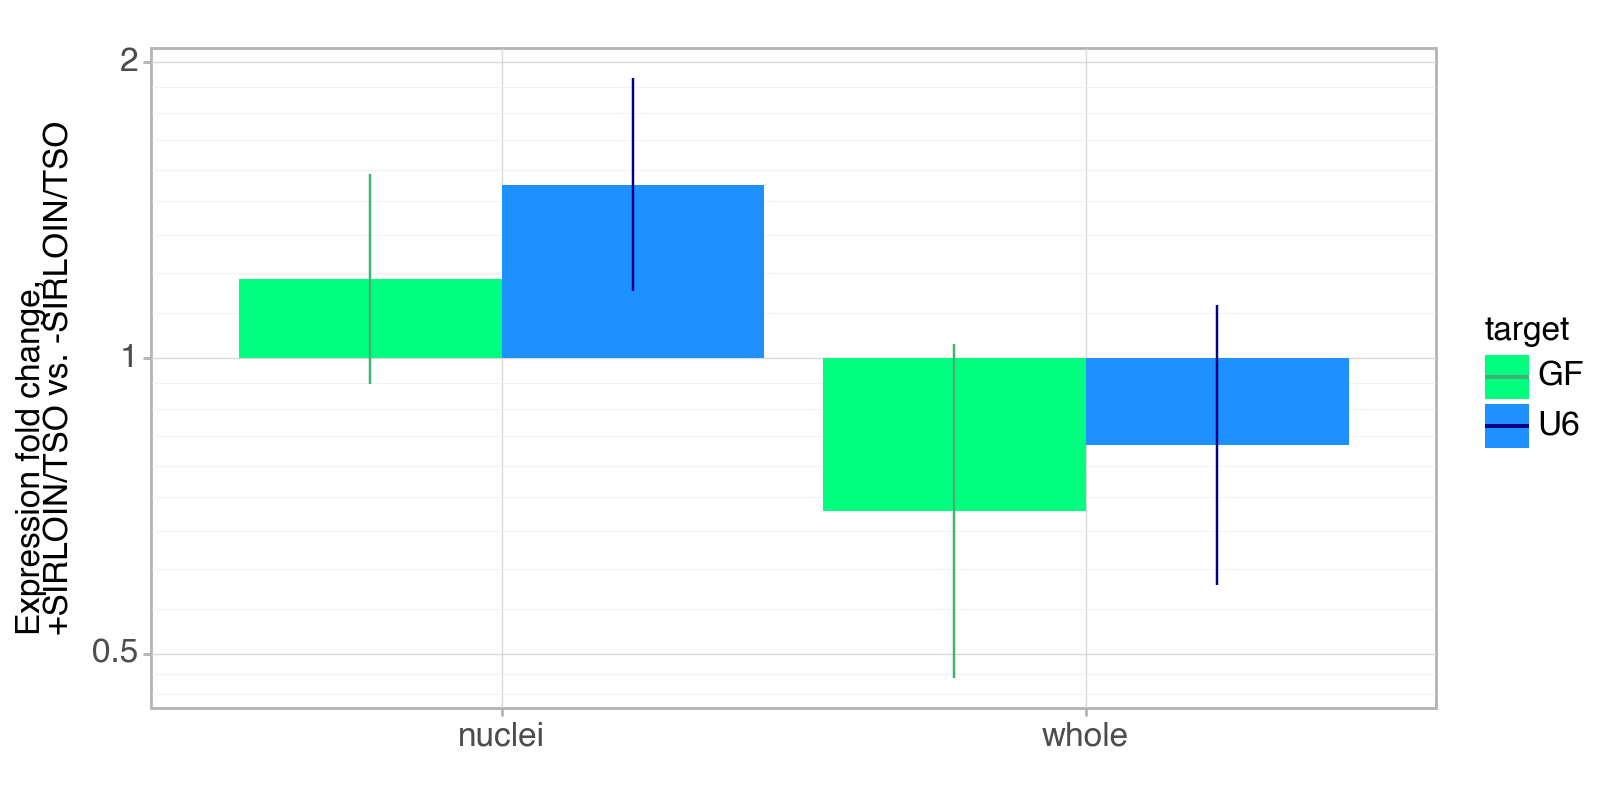

In [24]:
# paper fig S1A

p = (
    ggplot(df_plot.query("target != 'OG'"), aes(x = 'condition', y = 'expressionFC', fill = 'target')) +
    geom_col(position = 'dodge') +
    geom_linerange(aes(x = 'condition', ymin = 'expressionFC_max', ymax = 'expressionFC_min', color = 'target'), position = position_dodge(width = 0.9)) +
    scale_fill_manual(values={'U6': 'dodgerblue', 'GF': 'springgreen'}) +
    scale_color_manual(values={'U6': 'navy', 'GF': 'mediumseagreen'}) +
    scale_y_log10() +
    ylab("Expression fold change,\n+SIRLOIN/TSO vs. -SIRLOIN/TSO") +
    xlab("") +
    theme_light() +
    theme(text = element_text(size=12)) +
    theme(figure_size=(8,4))
)
p.draw()
p.save("figS1a_sirloin_RTPCR.pdf")